In [1]:
from rootpy.plotting import set_style
import ROOT
import pickle
import itertools
import uuid
from rootpy.memory import keepalive
set_style('ATLAS', shape='rect')

INFO:rootpy.plotting.style:using ROOT style 'ATLAS(shape=rect)'


Welcome to ROOTaaS 6.06/08


In file included from input_line_29:1:
In file included from /usr/include/dlfcn.h:41:
/usr/include/Availability.h:24:2: error: unterminated conditional directive
#ifndef __AVAILABILITY__
 ^
input_line_32:2:24: error: use of undeclared identifier 'RTLD_NOW'
 (dlopen("libRint.so", RTLD_NOW))
                       ^


In [2]:
def pull_plot(dict, comb, np_name):
    size = len(comb)
    #print size

    c = ROOT.TCanvas('c_{}'.format(uuid.uuid1().hex), np_name, 1000, 400)
    c.SetTopMargin(0.1)
    c.SetLeftMargin(0.05)

    ymin, ymax = -1.1, 1.1
    gr = ROOT.TGraphAsymmErrors(size)
    h = ROOT.TH1F('h_{}'.format(uuid.uuid1().hex), 'h_temp', size, 0, size)
    ip = 0
    for (cat, channel) in comb:
        k = cat
        kk = channel
        #print k, kk, dict[k][kk][np_name]
        nom, low, high = dict[k][kk][np_name]
        gr.SetPoint(ip, ip + 0.5, nom)
        gr.SetPointError(ip, 0.5, 0.5, -1 * low, high)
        #h.SetBinContent(ip + 1, 0)
        if 'boost' in k:
            icol = 2
        elif 'vbf' in k:
            icol = ROOT.kGreen + 2
        else:
            icol = 1

        h.GetXaxis().SetBinLabel(ip + 1,  '#color[{0}]{{{1} {2}}}'.format(icol, k, kk))
        ip = ip + 1


    h.GetXaxis().SetTitle('signal region')
    h.GetYaxis().SetTitle('pulls')
    h.GetXaxis().SetTitleSize(0.5 * h.GetXaxis().GetTitleSize())
    h.GetYaxis().SetTitleSize(0.5 * h.GetYaxis().GetTitleSize())
    h.GetYaxis().SetTitleOffset(0.5)
    h.GetXaxis().SetLabelSize(0.4 * h.GetXaxis().GetLabelSize())
    h.GetYaxis().SetLabelSize(0.5 * h.GetYaxis().GetLabelSize())
    h.GetYaxis().SetRangeUser(ymin, ymax)

    ttext = ROOT.TText(
        c.GetLeftMargin(), 1 - c.GetTopMargin() + 0.02,
        'nuisance parameter: {0}'.format(np_name))
    ttext.SetNDC(True)
    ttext.SetTextSize(20)
    lines = [
        ROOT.TLine(0, 1.0, size, 1.0),
        ROOT.TLine(0, 0.5, size, 0.5),
        ROOT.TLine(0, -0.5, size, -0.5),
        ROOT.TLine(0, -1.0, size, -1.0),
        ]
    h.Draw('HIST')
    gr.Draw('sameP')
    ttext.Draw('same')
    for l in lines:
        l.SetLineStyle(ROOT.kDashed)
        l.Draw('same')
    c.Update()
    #keepalive(h)
    #print h.GetXaxis().GetBinLabel(2)
    #c.SaveAs('pulls_{0}.png'.format(np_name))
    return c

In [3]:
def load_obj(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [4]:

channels = ['all', 'lephad', 'hadhad', 'leplep']
categories = ['all', 'vbf', 'boost']#, 'boost tight']
#comb = [('all', 'all')]
comb = [c for c in itertools.product(categories, channels)]

dict = load_obj('/Users/quentin/pulls_dict_rebinned.pkl')
np_names = dict['all']['all'].keys()
for n in sorted(np_names):
    print n

ATLAS_JES_PU_Rho
ATLAS_PRW_DATASF
ATLAS_TAU_EFF_ID_TOTAL
ATLAS_TAU_TES_INSITU
ATLAS_TAU_TES_MODEL
ZttTheory_CKK
ZttTheory_qsf
jet_jer_np0
jet_jer_np1
jet_jer_np2
jet_jer_np3
jet_jer_np4
jet_jer_np5


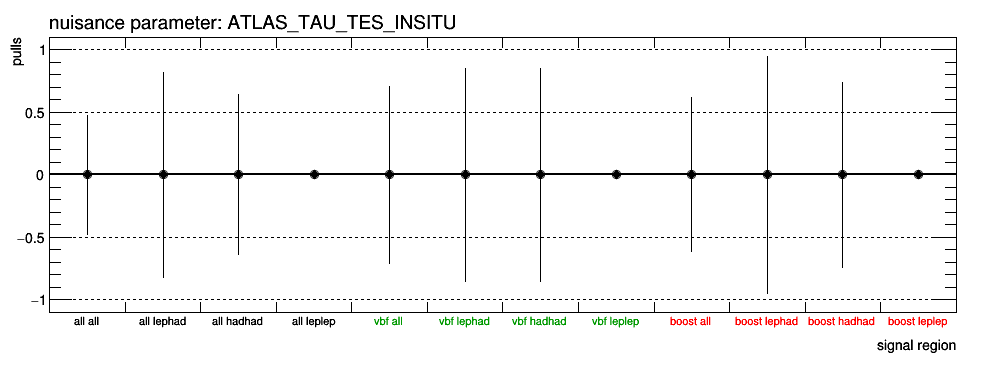

In [10]:
dict = load_obj('/Users/quentin/pulls_dict_rebinned.pkl')
pull_plot(dict, comb, 'ATLAS_TAU_TES_INSITU')

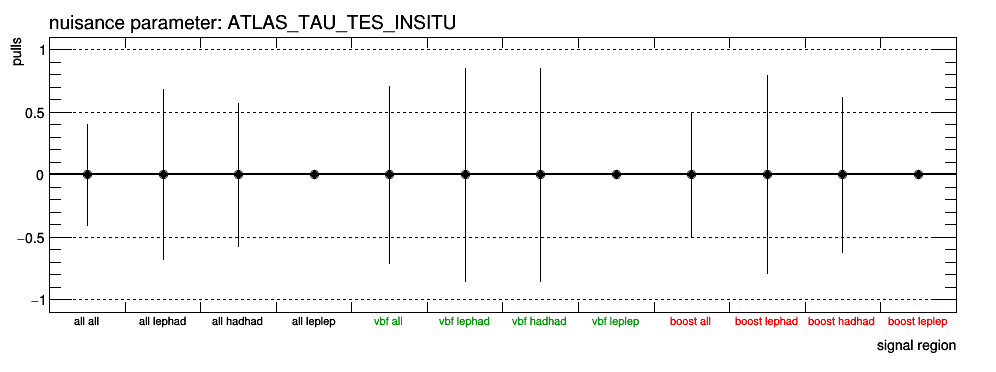

In [6]:
dict = load_obj('/Users/quentin/pulls_dict.pkl')
pull_plot(dict, comb, 'ATLAS_TAU_TES_INSITU')

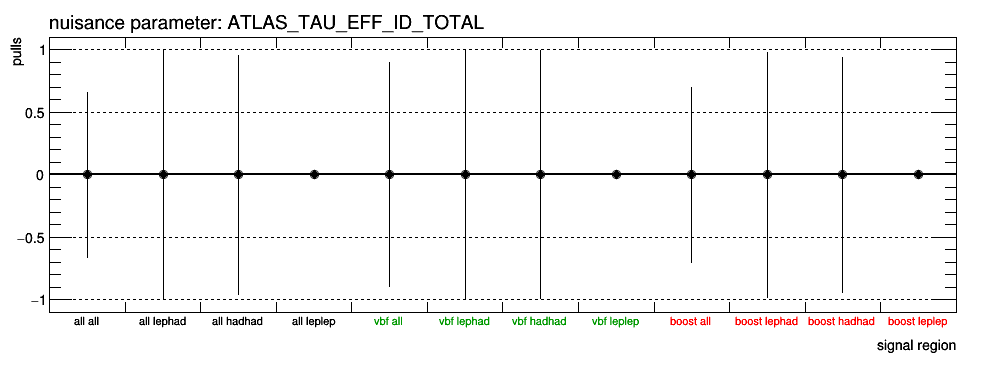

In [7]:
pull_plot(dict, comb, 'ATLAS_TAU_EFF_ID_TOTAL')

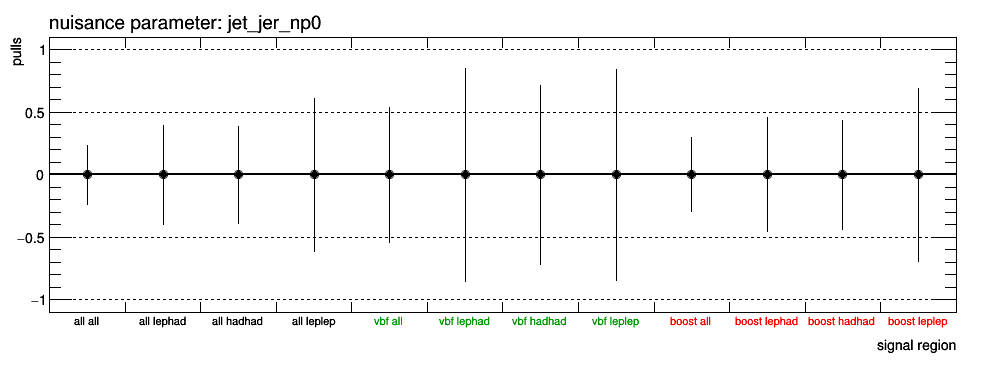

In [8]:
pull_plot(dict, comb, 'jet_jer_np0')